In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r'C:/Users/Admin/Downloads/final.csv')
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [3]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [4]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [5]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [6]:
# unknwn data is covert to blue-collar
df['job'] = df['job'].str.replace("unknown","blue-collar")

In [7]:
df['job'].value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [8]:
df['education_qual'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [9]:
df['education_qual'] = df['education_qual'].str.replace("unknown","secondary")

In [10]:
df['call_type'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [11]:
df['mon'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [12]:
df['prev_outcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [13]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [14]:
df['target'] = df['y'].map({"no":0,"yes":1})

In [15]:
df['target']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: target, Length: 45211, dtype: int64

In [16]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,no,0
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes,1
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no,0


In [17]:
df.drop("y",axis = 1,inplace = True)

In [18]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

<AxesSubplot:xlabel='job', ylabel='target'>

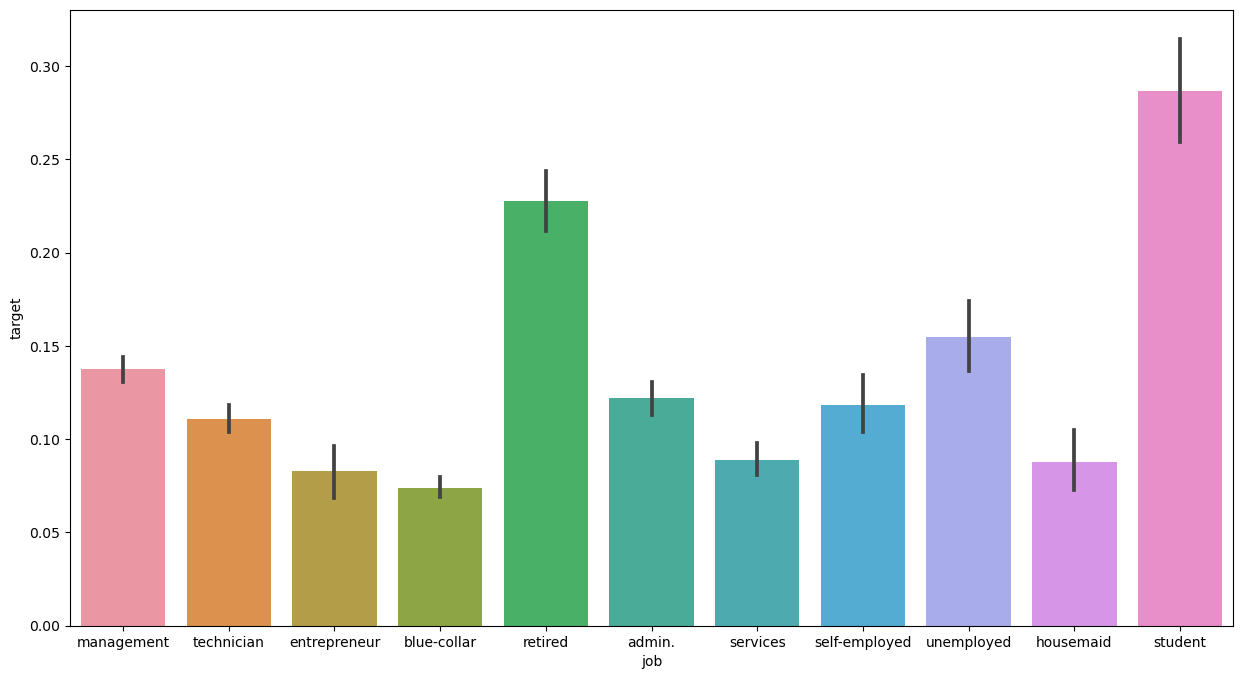

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(x='job',y='target',data=df)

In [20]:
df.day.unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

In [21]:
def segment_day(day):
    day==int(day)
    if day >=1 and day<=7:
        return 'first week'
    elif day>8 and day<=14:
        return 'second week'
    elif day>=15 and day <=21:
        return 'third week'
    elif day >=22 and day<=28:
        return 'fourth week'
    else:
        return 'others'
df['day'] =df['day'].apply(segment_day) 
        

In [22]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58,management,married,tertiary,unknown,first week,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,first week,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,first week,may,76,1,unknown,0
3,47,blue-collar,married,secondary,unknown,first week,may,92,1,unknown,0
4,33,blue-collar,single,secondary,unknown,first week,may,198,1,unknown,0


In [23]:
df.mon.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [24]:
def segment_month(mon):
    if mon in ['jan','feb','mar']:
        return 'Fourth Quarter'
    if mon in ['apl','may','jun']:
        return 'First Quarter'
    if mon in ['jul','aug','sep']:
        return 'Second Quarter'
    else:
        return 'Thirth Quarter'
    
df['mon'] = df['mon'].apply(segment_month)

In [25]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58,management,married,tertiary,unknown,first week,First Quarter,261,1,unknown,0
1,44,technician,single,secondary,unknown,first week,First Quarter,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,first week,First Quarter,76,1,unknown,0
3,47,blue-collar,married,secondary,unknown,first week,First Quarter,92,1,unknown,0
4,33,blue-collar,single,secondary,unknown,first week,First Quarter,198,1,unknown,0


<AxesSubplot:xlabel='mon', ylabel='target'>

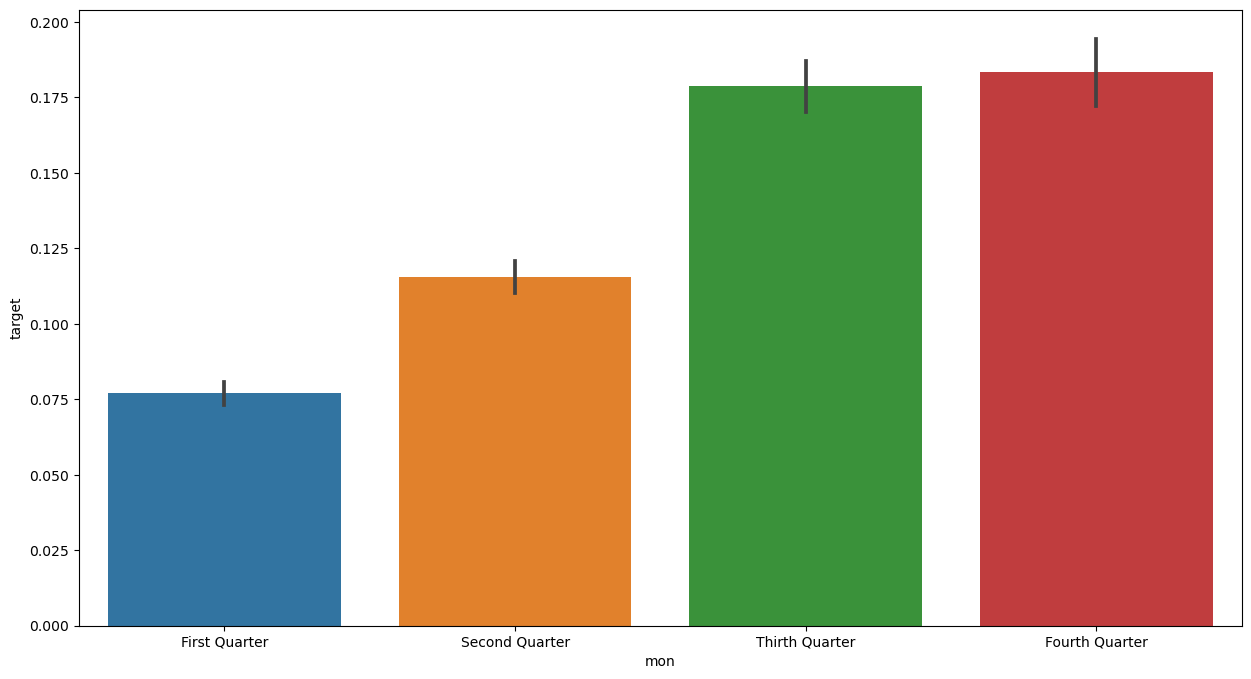

In [26]:
plt.figure(figsize=(15,8))
sns.barplot(x='mon',y='target',data=df)

In [27]:
%matplotlib inline

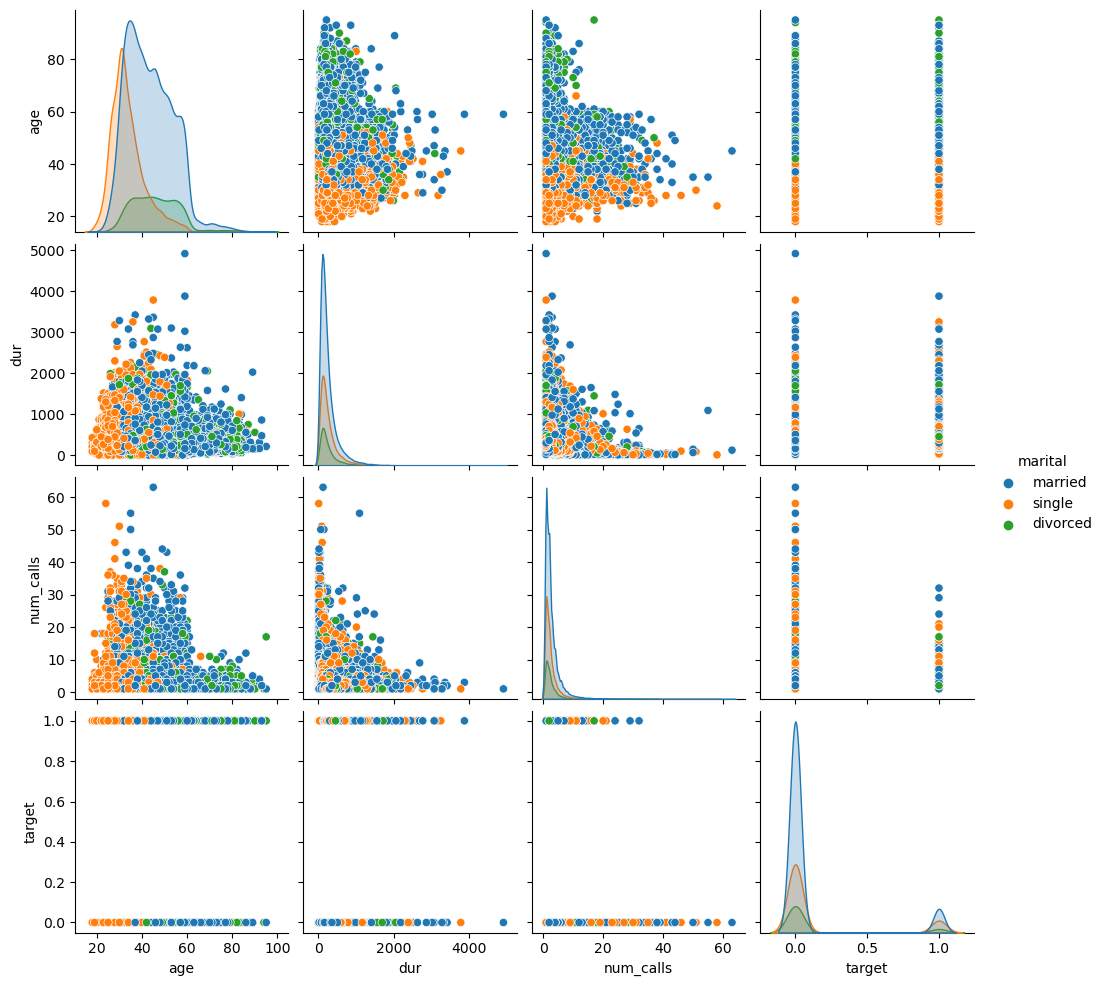

In [28]:
sns.pairplot(df,hue='marital')

<AxesSubplot:xlabel='marital', ylabel='target'>

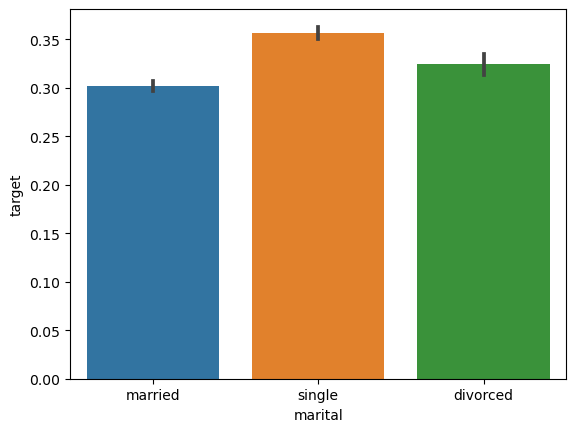

In [29]:
sns.barplot(y='target',x='marital',data=df,estimator=np.std)

In [30]:
df['target'].value_counts()

0    39922
1     5289
Name: target, dtype: int64

<AxesSubplot:xlabel='education_qual', ylabel='target'>

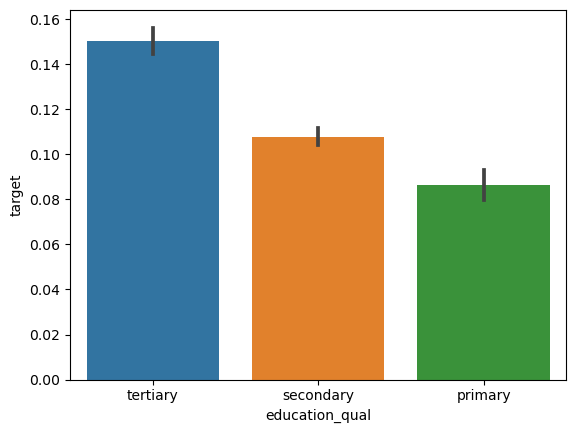

In [31]:
sns.barplot(x='education_qual',y='target',data=df)

<AxesSubplot:>

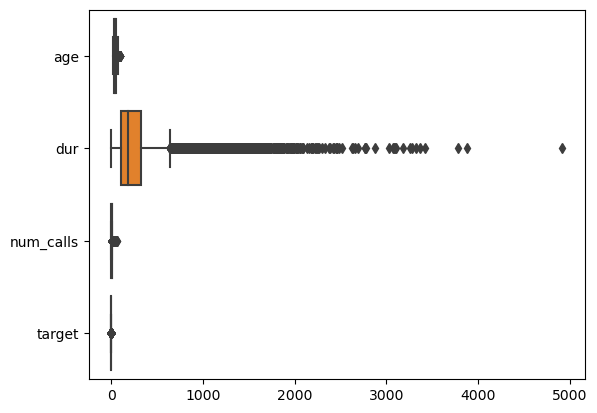

In [32]:
sns.boxplot(data=df,orient='h')

<AxesSubplot:xlabel='marital', ylabel='target'>

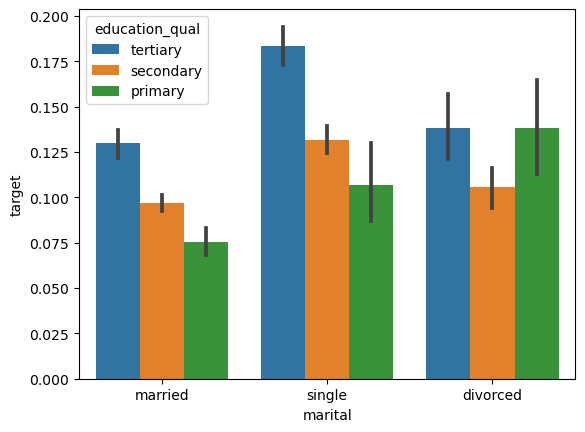

In [33]:
sns.barplot(x='marital',y='target',data=df,hue='education_qual')

In [34]:
df.day.unique()

array(['first week', 'others', 'second week', 'third week', 'fourth week'],
      dtype=object)

<AxesSubplot:xlabel='day', ylabel='target'>

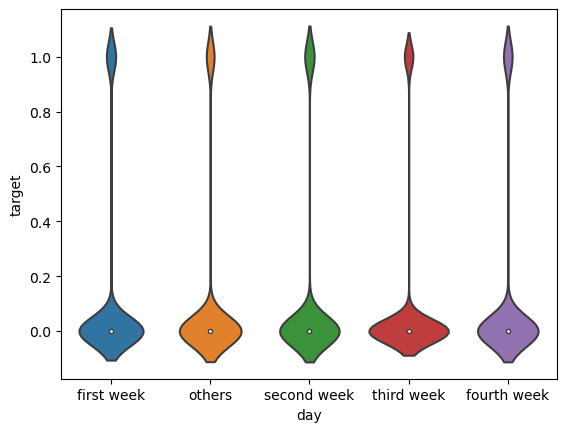

In [35]:
sns.violinplot(x='day',y='target',data=df)

<AxesSubplot:xlabel='prev_outcome', ylabel='target'>

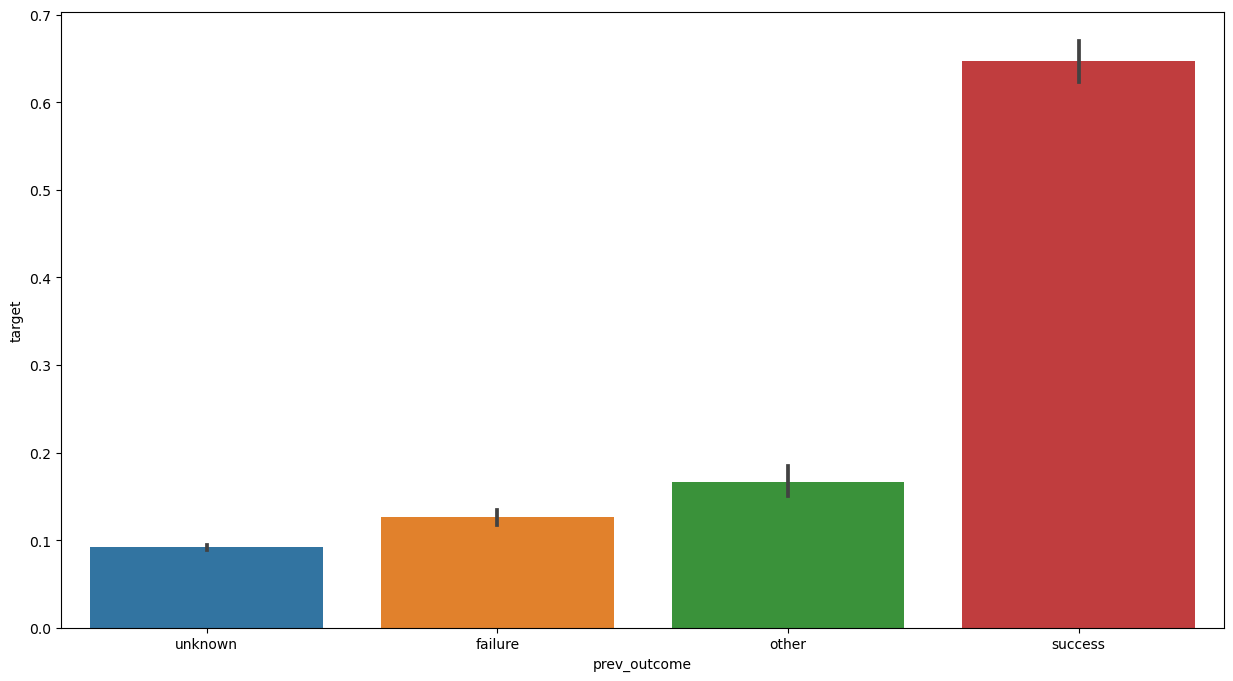

In [36]:
plt.figure(figsize=(15,8))
sns.barplot(x='prev_outcome',y='target',data=df)

<AxesSubplot:>

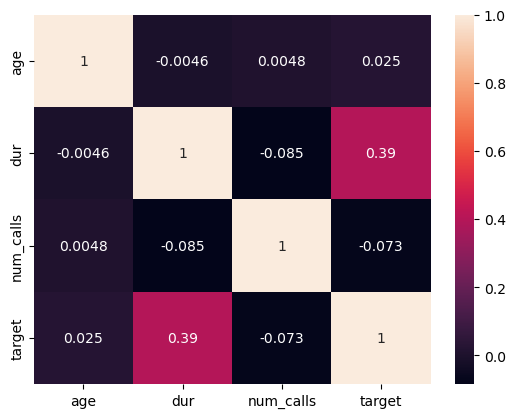

In [37]:
sns.heatmap(df.corr(),annot=True,)

In [38]:
# dfheat=df.pivot_table(values ='target',index='mon',columns='day')

<AxesSubplot:xlabel='day', ylabel='mon'>

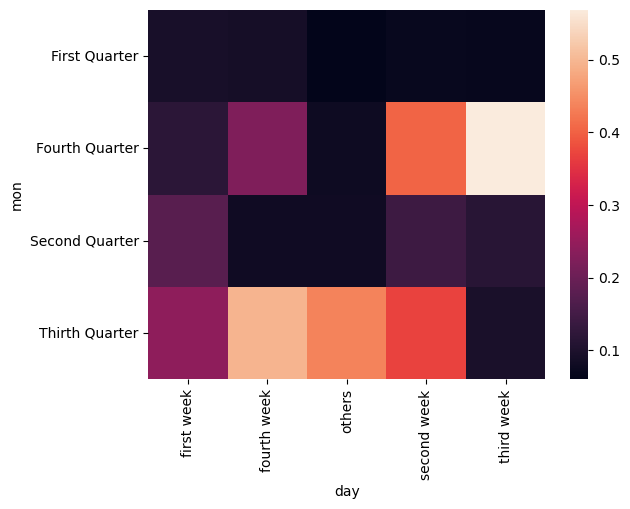

In [39]:
# sns.heatmap(dfheat)

In [40]:
# heat=df.pivot_table(values ='target',columns ='education_qual',index ='job')

<AxesSubplot:xlabel='education_qual', ylabel='job'>

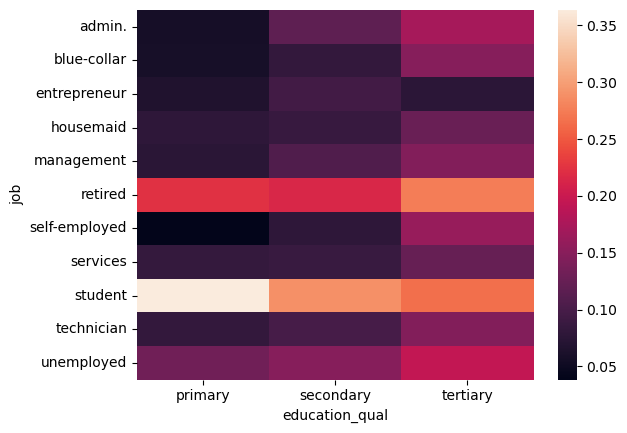

In [41]:
# sns.heatmap(heat)

# label encoding

In [42]:
cat_cols = [col for col in df.columns if df[col].dtype =='object']
cat_cols
df[cat_cols]

,job,marital,education_qual,call_type,day,mon,prev_outcome
0,management,married,tertiary,unknown,first week,First Quarter,unknown
1,technician,single,secondary,unknown,first week,First Quarter,unknown
2,entrepreneur,married,secondary,unknown,first week,First Quarter,unknown
3,blue-collar,married,secondary,unknown,first week,First Quarter,unknown
4,blue-collar,single,secondary,unknown,first week,First Quarter,unknown
...,...,...,...,...,...,...,...
45206,technician,married,tertiary,cellular,third week,Thirth Quarter,unknown
45207,retired,divorced,primary,cellular,third week,Thirth Quarter,unknown
45208,retired,married,secondary,cellular,third week,Thirth Quarter,success
45209,blue-collar,married,secondary,telephone,third week,Thirth Quarter,unknown


In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [44]:
for col in df[cat_cols]:
    df[col] = le.fit_transform(df[col])

In [45]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58,4,1,2,2,0,0,261,1,3,0
1,44,9,2,1,2,0,0,151,1,3,0
2,33,2,1,1,2,0,0,76,1,3,0
3,47,1,1,1,2,0,0,92,1,3,0
4,33,1,2,1,2,0,0,198,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,4,3,977,3,3,1
45207,71,5,0,0,0,4,3,456,2,3,1
45208,72,5,1,1,0,4,3,1127,5,2,1
45209,57,1,1,1,1,4,3,508,4,3,0


<AxesSubplot:>

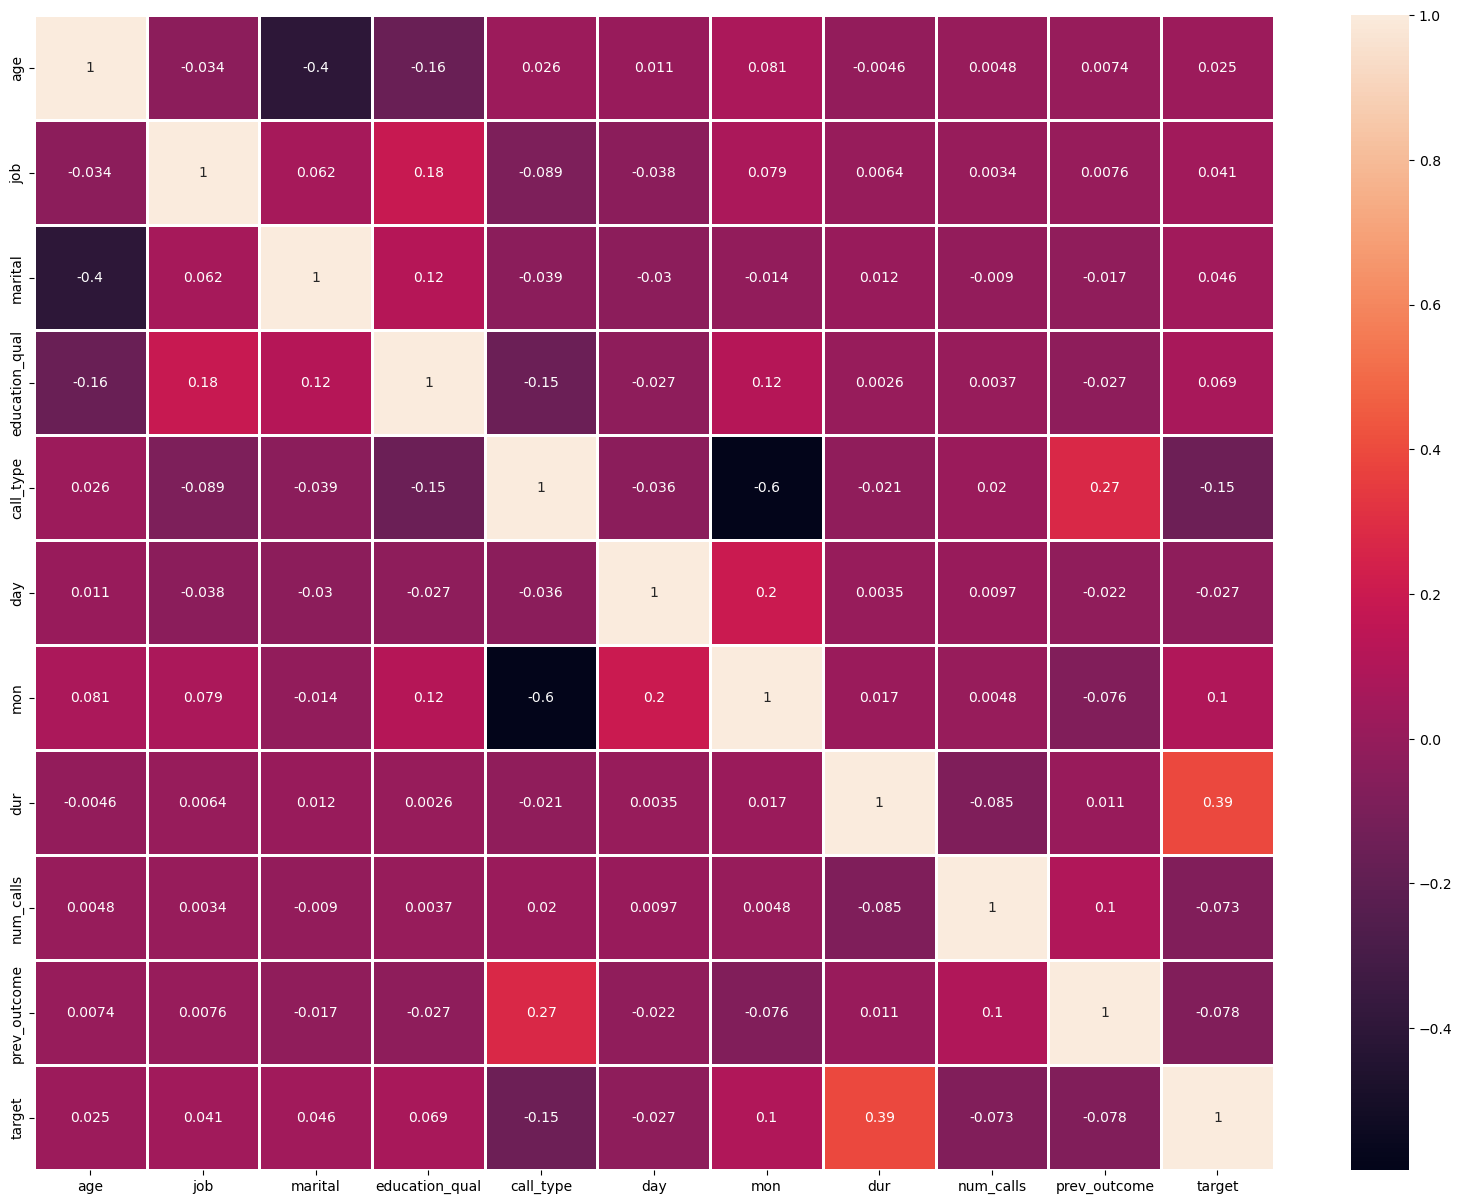

In [46]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=1,linecolor='white',annot =True)

# unbalancing data

<AxesSubplot:>

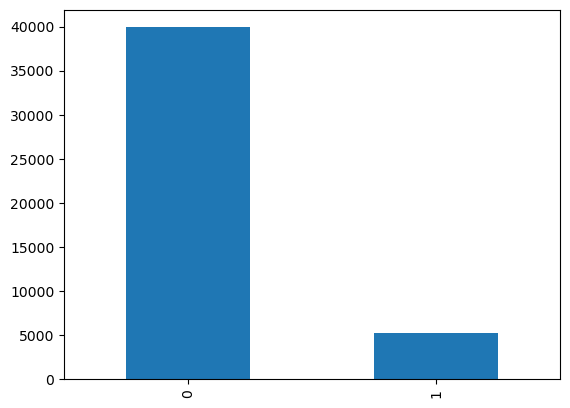

In [47]:
df['target'].value_counts().plot(kind = 'bar')

In [48]:
df.target.value_counts()

0    39922
1     5289
Name: target, dtype: int64

#  using under sampling method

In [49]:
# 0 means ins_not_buying
# 1 means ins_buying
ins_not_buy=df[df['target']==0]
ins_buy=df[df['target']==1]

In [50]:
ins_buy.shape

(5289, 11)

In [51]:
ins_not_buy.shape

(39922, 11)

In [52]:
ins_not_purchased =ins_not_buy.sample(n=5289) 

In [53]:
ins_not_purchased.shape

(5289, 11)

In [54]:
new_df=pd.concat([ins_not_purchased,ins_buy],axis= 0)

In [55]:
new_df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
43155,27,9,1,1,2,1,1,889,1,3,0
3611,52,0,1,1,2,4,0,391,3,3,0
9646,33,4,1,2,2,0,0,124,3,3,0
30585,44,4,1,2,1,0,1,135,2,1,0
35471,47,2,2,2,0,0,0,308,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45204,73,5,1,1,0,4,3,300,1,0,1
45205,25,9,2,1,0,4,3,386,2,3,1
45206,51,9,1,2,0,4,3,977,3,3,1
45207,71,5,0,0,0,4,3,456,2,3,1


<AxesSubplot:>

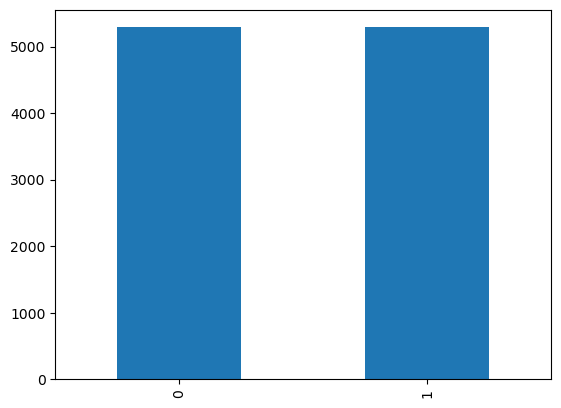

In [56]:
new_df['target'].value_counts().plot(kind='bar')

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [58]:
model = LogisticRegression()

In [59]:
X = new_df.drop('target',axis = 1)

In [60]:
X

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
43155,27,9,1,1,2,1,1,889,1,3
3611,52,0,1,1,2,4,0,391,3,3
9646,33,4,1,2,2,0,0,124,3,3
30585,44,4,1,2,1,0,1,135,2,1
35471,47,2,2,2,0,0,0,308,1,0
...,...,...,...,...,...,...,...,...,...,...
45204,73,5,1,1,0,4,3,300,1,0
45205,25,9,2,1,0,4,3,386,2,3
45206,51,9,1,2,0,4,3,977,3,3
45207,71,5,0,0,0,4,3,456,2,3


In [61]:
scaler.fit(X)
scaler_data=scaler.transform(X)

In [62]:
X =scaler_data
y=new_df['target']

In [63]:
X.shape

(10578, 10)

In [64]:
y

43155    0
3611     0
9646     0
30585    0
35471    0
        ..
45204    1
45205    1
45206    1
45207    1
45208    1
Name: target, Length: 10578, dtype: int64

In [65]:
X_train,x_test,y_train,y_test =train_test_split(X,y,test_size = 0.2,stratify=y,random_state=2)

In [66]:
X_train.shape,x_test.shape,y_train.shape,y_test.shape

((8462, 10), (2116, 10), (8462,), (2116,))

In [67]:
model.fit(X_train,y_train)

LogisticRegression()

# Accuracy Score

In [68]:
training_data = model.predict(X_train)
training_accuracy = accuracy_score(y_train,training_data)
print("Accuracy score on trainind data:",training_accuracy)

Accuracy score on trainind data: 0.7673126920349799


In [69]:
test_data = model.predict(x_test)
testing_accuracy = accuracy_score(y_test,test_data)
print("Accurscy score on test data:",testing_accuracy)

Accurscy score on test data: 0.7566162570888468


In [71]:
from sklearn.metrics import f1_score
f1_score = f1_score(y_test,test_data)
print("test_data_f1_score:", f1_score)

test_data_f1_score: 0.7529976019184653


# XGBClassifier

In [72]:
import xgboost as xgb
# Create an instance of the XGBClassifier
clf = xgb.XGBClassifier()

# Train the XGBoost model
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8251417769376181
